In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from scipy import stats



sys.path.append('../../..')

In [2]:
from scripts import project_functions as pf

In [3]:
path = "/Users/nitchakan/Desktop/DATA301/project-group45-project/data/raw/GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.csv"

df = pf.load_and_process(path)
df

,taxonomy,A1,A10,A100,A101,A102,A104,A105,A106,A108,...,TD_ASDdiff,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,Positive
7,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,0,0,485,142,1,113,1,7685,111,...,20,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Bacteroidaceae,_g__Bacteroides,_s__Bacteroides_coprophilus,1
8,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,50,10,13,17,9,15,9,5,9,...,1,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Ruminiclostridium_9,_s__uncultured_organism_g__Ruminiclostridium_9,1
11,d__Bacteria;_k__norank;_p__Firmicutes;_c__Nega...,0,0,0,0,0,0,0,0,0,...,-12,d__Bacteria,_k__norank,_p__Firmicutes,_c__Negativicutes,_o__Selenomonadales,_f__Veillonellaceae,_g__Mitsuokella,_s__uncultured_bacterium_g__Mitsuokella,0
15,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,6,2,3,10,3,5,6,...,-1,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Peptostreptococcaceae,_g__Terrisporobacter,_s__uncultured_organism_g__Terrisporobacter,0
18,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,1,3,4,1,2,2,7,4,...,1,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Faecalibacterium,_s__unclassified_g__Faecalibacterium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,8,13,0,4,32,13,1,3,0,...,-5,d__Bacteria,_k__norank,_p__Bacteroidetes,_c__Bacteroidia,_o__Bacteroidales,_f__Bacteroidaceae,_g__Bacteroides,_s__Bacteroides_clarus,0
1277,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,12,14,21,16,15,21,22,23,23,...,2,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Lachnospiraceae,_g__Lachnoclostridium,_s__[Clostridium]_symbiosum,1
1284,d__Bacteria;_k__norank;_p__Firmicutes;_c__Nega...,0,0,0,0,0,0,0,0,0,...,-3,d__Bacteria,_k__norank,_p__Firmicutes,_c__Negativicutes,_o__Selenomonadales,_f__Veillonellaceae,_g__Megasphaera,_s__uncultured_bacterium_g__Megasphaera,0
1294,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,137,176,238,242,178,94,208,54,223,...,28,d__Bacteria,_k__norank,_p__Firmicutes,_c__Clostridia,_o__Clostridiales,_f__Ruminococcaceae,_g__Ruminococcus_2,_s__unclassified_g__Ruminococcus_2,1


In [4]:
# profile=ProfileReport(df)
# ProfileReport(df).to_notebook_iframe()

In [5]:
test = "_g__hellp"
test.split("__")[-1]

'hellp'

In [6]:
df['Domain'] = df['Domain'].str.split("__").str[-1]
df['Kingdom'] = df['Kingdom'].str.split("__").str[-1]
df['Phylum'] = df['Phylum'].str.split("__").str[-1]
df['Class'] = df['Class'].str.split("__").str[-1]
df['Order'] = df['Order'].str.split("__").str[-1]
df['Family'] = df['Family'].str.split("__").str[-1]
df['Genus'] = df['Genus'].str.split("__").str[-1]
df['Species'] = df['Species'].str.split("s__").str[-1]

df

,taxonomy,A1,A10,A100,A101,A102,A104,A105,A106,A108,...,TD_ASDdiff,Domain,Kingdom,Phylum,Class,Order,Family,Genus,Species,Positive
7,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,0,0,485,142,1,113,1,7685,111,...,20,Bacteria,norank,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_coprophilus,1
8,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,50,10,13,17,9,15,9,5,9,...,1,Bacteria,norank,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminiclostridium_9,uncultured_organism_g__Ruminiclostridium_9,1
11,d__Bacteria;_k__norank;_p__Firmicutes;_c__Nega...,0,0,0,0,0,0,0,0,0,...,-12,Bacteria,norank,Firmicutes,Negativicutes,Selenomonadales,Veillonellaceae,Mitsuokella,uncultured_bacterium_g__Mitsuokella,0
15,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,0,6,2,3,10,3,5,6,...,-1,Bacteria,norank,Firmicutes,Clostridia,Clostridiales,Peptostreptococcaceae,Terrisporobacter,uncultured_organism_g__Terrisporobacter,0
18,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,0,1,3,4,1,2,2,7,4,...,1,Bacteria,norank,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Faecalibacterium,unclassified_g__Faecalibacterium,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,d__Bacteria;_k__norank;_p__Bacteroidetes;_c__B...,8,13,0,4,32,13,1,3,0,...,-5,Bacteria,norank,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides_clarus,0
1277,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,12,14,21,16,15,21,22,23,23,...,2,Bacteria,norank,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Lachnoclostridium,[Clostridium]_symbiosum,1
1284,d__Bacteria;_k__norank;_p__Firmicutes;_c__Nega...,0,0,0,0,0,0,0,0,0,...,-3,Bacteria,norank,Firmicutes,Negativicutes,Selenomonadales,Veillonellaceae,Megasphaera,uncultured_bacterium_g__Megasphaera,0
1294,d__Bacteria;_k__norank;_p__Firmicutes;_c__Clos...,137,176,238,242,178,94,208,54,223,...,28,Bacteria,norank,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcus_2,unclassified_g__Ruminococcus_2,1


In [7]:
df.describe()

,A1,A10,A100,A101,A102,A104,A105,A106,A108,A109,...,B58,B59,B6,B60,B61,AllAvg,TDmean,ASDmean,TD_ASDdiff,Positive
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,82.020833,81.888021,81.539062,81.651042,81.757812,81.861979,81.669271,81.802083,81.421875,81.882812,...,81.947917,81.328125,81.713542,82.187500,81.872396,81.635923,81.646999,81.628754,-0.013021,0.434896
std,448.243715,345.704715,249.389267,357.129590,360.299420,371.414099,289.199738,454.425477,425.007214,330.451040,...,382.880763,581.122702,340.922740,331.526261,413.945509,242.181041,254.530197,234.399520,85.117411,0.496390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.003968,0.000000,0.000000,-554.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,3.909722,3.475524,3.759009,-6.000000,0.000000
50%,4.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,6.000000,4.000000,...,3.000000,1.000000,6.000000,2.000000,2.000000,9.964286,9.479021,11.441441,-1.000000,0.000000
75%,29.250000,32.250000,51.500000,40.250000,26.000000,39.000000,37.250000,33.000000,34.250000,24.000000,...,22.000000,12.250000,33.250000,16.000000,18.500000,48.963294,47.734266,49.006757,2.000000,1.000000
max,5865.000000,4808.000000,2616.000000,5839.000000,5701.000000,5758.000000,3064.000000,7685.000000,7544.000000,3742.000000,...,5148.000000,8602.000000,4702.000000,3696.000000,6184.000000,2864.325397,2886.741259,2833.423423,1261.000000,1.000000


In [8]:
#dropping outliers

# df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
# df[np.abs(df.Data-df.Data.mean()) <= (3*df.Data.std())]

# q = df["col"].quantile(0.99)
# df = df[df.between(df.quantile(.15), df.quantile(.85))]

# def drop_numerical_outliers(df, z_thresh=3):
#     # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
#     constrains = df.select_dtypes(include=[np.number]) \
#         .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
#         .all(axis=1)
#     # Drop (inplace) values set to be rejected
#     df.drop(df.index[~constrains], inplace=True)
    
    
# drop_numerical_outliers(df)


In [9]:
#trying to make the neg values in red in pos in green

# def bar_color(df,color1,color2):
#     return np.where(df.TD_ASDdiff>0,color1,color2).T

# df.TD_ASDdiff.plot.barh(color=bar_color(df.TD_ASDdiff, 'r', 'g'))

Note:

positive values = TD

negative values = ASD

### Task 3

**All of functions that are commented out below, just for the sake of visualizations, shows the table of each level of taxonomy abundance in TD and ASD groups:**


In [10]:
# at phylum level

dfP = (df.groupby('Phylum')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfP

,TD_ASDdiff
Phylum,
Bacteroidetes,21.824176
Synergistetes,2.000000
Firmicutes,-4.692913
Tenericutes,-6.222222
Proteobacteria,-12.909091
Fusobacteria,-62.000000
Actinobacteria,-65.200000
Verrucomicrobia,-73.000000



#### To visualize the bacteria abundance in each level of the taxonomy... we first need to find the best graph that could help others better observe my findings


**This is graph test visualizations part.**

In [16]:
sns.set_style('white')
sns.set_palette('Set2')

Note:
- Hexbin plot won't work because the taxonomy is not a number but a string
- Pairplot won't be a good idea since most the axes would be the name of bacteria.

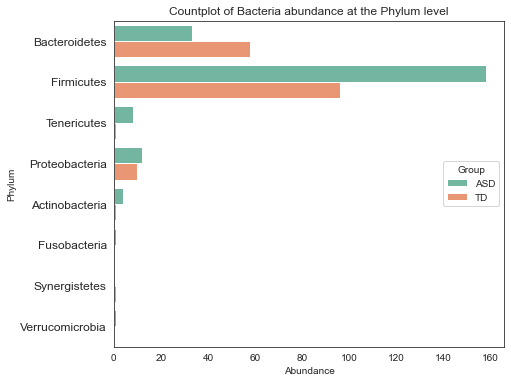

In [95]:
fig, ax = plt.subplots(figsize = (7, 6))

pt1 = sns.countplot(y='Phylum', data=df, hue='Positive')
ax.legend(title ="Group", labels= ['ASD','TD'])
ax.set_title('Countplot of Bacteria abundance at the Phylum level')
ax.set_xlabel('Abundance')
ax.set_ylabel('Phylum')
ax.yaxis.set_tick_params(labelsize='large')

plt.show()

The graph above shows the phylum of bacteria abundance in each group. 
I think this graph could work. It's very nice to look at and see the difference in bacteriai abundance in both groups for each phylum.

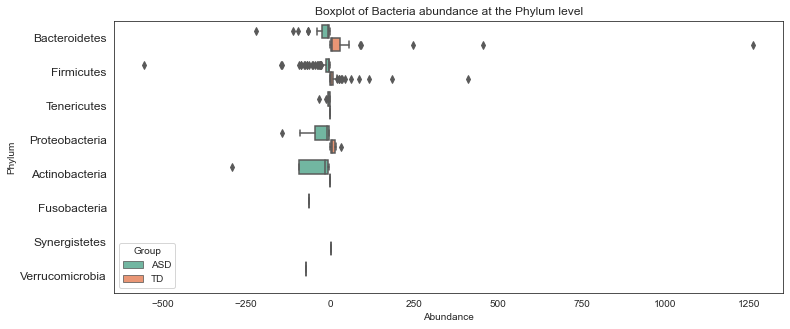

In [63]:
fig, ax = plt.subplots(figsize = (12, 5))


p2 = sns.boxplot(data=df, x='TD_ASDdiff', y='Phylum', hue='Positive',)
handles, _ = ax.get_legend_handles_labels() 
ax.legend(handles, ["ASD", "TD"], loc="best", title="Group")
ax.set_title('Boxplot of Bacteria abundance at the Phylum level')
ax.set_xlabel('Abundance')
ax.set_ylabel('Phylum')
ax.yaxis.set_tick_params(labelsize='large')

plt.show()

The boxplot above shows the bacteria abundance at the Phylum level in TD and ASD group.

I don't think I like my data to be visualize this way. I think is a bit confusing when looking at it like this. I rather prefer the upper bargraph to comparing how much bacteria abundnace is present in each group and at the phylum level to this boxplot here.

In [200]:
#ummm how do you scale this graph?

# sns.pairplot(data=df,corner=True,
#             x_vars=["Phylum","Class", "Order", "TD_ASDdiff"], 
#             y_vars=["Phylum","Class", "Order", "TD_ASDdiff"], 
#             )
# plt.show()

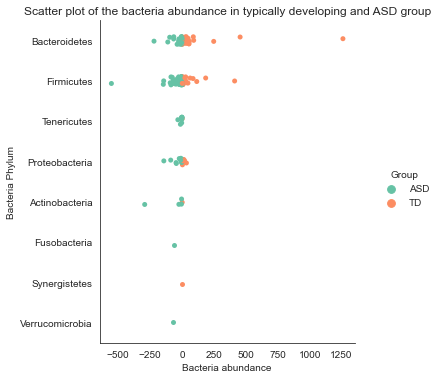

In [106]:
#I see the outliers here

p3 = sns.catplot(y="Phylum", x="TD_ASDdiff", data=df, hue = "Positive", legend=True)
p3._legend.set_title("Group")
new_labels=['ASD', 'TD']
for t, l in zip(p3._legend.texts, new_labels): t.set_text(l)
ax.yaxis.set_tick_params(labelsize='large')
plt.title('Scatter plot of the bacteria abundance in typically developing and ASD group')
plt.ylabel('Bacteria Phylum')
plt.xlabel('Bacteria abundance')


plt.show()

A scatterplot above shows the relationship between the bacteria abundance at the phylum level in TD and ASD group.
I don't think this is the best graph to represent my data and the result of the calculations that I have done to obtained the values. And it doesn't bring out the important information that I would like it to be in my graph.

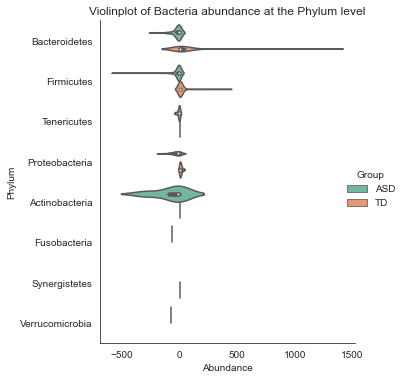

In [79]:
p4 = sns.catplot(x="TD_ASDdiff", y="Phylum", kind="violin", data=df, hue = 'Positive', legend=True
                 ).set(title='Violinplot of Bacteria abundance at the Phylum level',
                      xlabel= 'Abundance', 
                      ylabel='Phylum')
p4._legend.set_title("Group")
new_labels=['ASD', 'TD']
for t, l in zip(p4._legend.texts, new_labels): t.set_text(l)
ax.yaxis.set_tick_params(labelsize='large')

plt.show()

The graph above shows the bacteria abundance at the phylum level in
TD and ASD group.

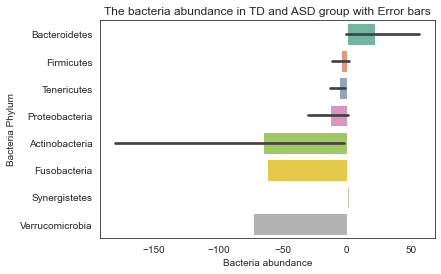

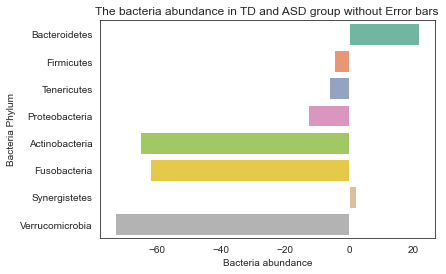

In [218]:
#plot showing the bacteria abundance in ASD and TD individuals at phylum.

# with error bars
sns.barplot(x='TD_ASDdiff', y='Phylum', data =df)
plt.title('The bacteria abundance in TD and ASD group with Error bars')
plt.ylabel('Bacteria Phylum')
plt.xlabel('Bacteria abundance')
ax.yaxis.set_tick_params(labelsize='large')

plt.show()


#removed the error bars and color coded the groups by values

# custom_palette = {}
# for q in set(df.TD_ASDdiff):
#     avr = (np.average(df[df.TD_ASDdiff == q].Positive))
#     if avr == 1:
#         custom_palette[q] = 'r'
#     else :
#         custom_palette[q] = 'y'

#without error bars
sns.barplot(x='TD_ASDdiff', y='Phylum', data =df, ci=None,) #palette=custom_palette)
plt.title('The bacteria abundance in TD and ASD group without Error bars')
plt.ylabel('Bacteria Phylum')
plt.xlabel('Bacteria abundance')
# plt.legend(title="Group", labels=["ASD", "TD"])
ax.yaxis.set_tick_params(labelsize='large')

plt.show()

I think the graph without the error bars would be better as it's cleaner compared to the graph above.

### Task 4

In this milestone, I performed a Data Analysis on the "GSE113690_Autism_16S_rRNA_OTU_assignment_and_abundance.csv". My first step was going through all the steps of a Data Analysis pipeline (load, clean and process). First, I took the mean of all the rows and remove values that are less than 1 to clean the dataset and for better visualizations. Then I performed the mean bacteria abundance calculations of each group (there are two groups in the data set: TD and ASD) as well as the differences in bacteria abundance of each group. I, then, further cleaned the data by removing the differences in bacteria abundance of both groups by dropping all values that are equal to 0. For a better understanding of the taxonomy of the bacteria, the taxonomy column in the dataset was split into 8 columns that corresponds to each level of the taxonomy. From that, the graphs of the bacteria abundance correspond to each level of the taxonomy were created to explore the shift of the gut microbiota of a typically developing (non-ASD) group and an ASD group at a specific level. My findings of the dataset are below:

Q1. what are the top main bacteria abundance present in ASD and TD individuals at the Class and Order level?

At the class level, Verrucomicrobiae, Actinobacteria, Fusobacteria and Gammaproteobacteria were more abundant in ASD group while Bacteroidia was more abundant in TD group. At the Order level, order Bifidobacteriales(class actinobacteria), Verrucomicrobiales, Fusobacteriales, Neisseriales (class betaproteobacteria) and Enterobacteriales were more abundant in ASD group, while Bacteroidales was more abundant in TD group. 




Q2. What are the major bacteria abundance at the family, genus and species level?

At the genus level, the genera Escherichia-Shigella, Dialister, Bifidobacterium were more abundant in ASD group, while Prevotella 9 and Megamonas and Rumicoccus 2 were more abundant in TD group. At the species level, Bifidobacterium pseudocatenulatum DSM 20438 JCM1200 LMG 10505, unclassified Dialister, Bacteroides uniformis, uncultured organisms of Faecalibacterium, and uncultured Lachnospiraceae NK4A136 group were more abundant in ASD group. The uncultured organisms of Prevotella 9, Bacteroides stercoris ATCC 43183, Bacteroides plebeius, and unclassified Magamonas were more abundant in TD group. 


### Reseach Questions**
#### Q1: what are the top main bacteria abundance present in ASD and TD individuals at Class and Order level?

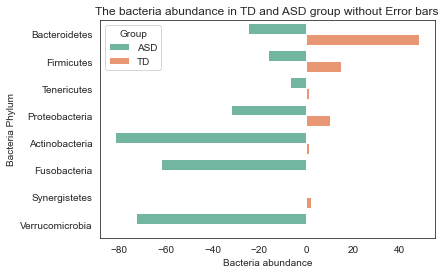

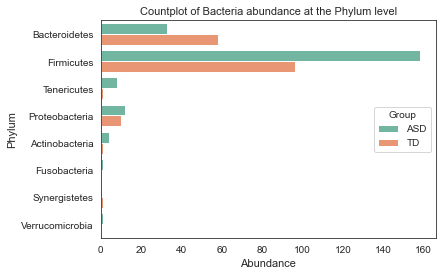

In [214]:
# removed the error bars in the graph and added the legendary for the groups

sns.barplot(x='TD_ASDdiff', y='Phylum', data =df, ci=None, hue='Positive')
plt.title('The bacteria abundance in TD and ASD group without Error bars')
plt.ylabel('Bacteria Phylum')
plt.xlabel('Bacteria abundance')
plt.legend(title="Group", labels=["ASD", "TD"])
ax.yaxis.set_tick_params(labelsize='large')

plt.show()

pt1 = sns.countplot(y='Phylum', data=df, hue='Positive')
plt.title('Countplot of Bacteria abundance at the Phylum level', fontsize=11)
plt.xlabel('Abundance', fontsize=11)
plt.ylabel('Phylum', fontsize=11)
plt.legend(title="Group", labels=["ASD", "TD"])
ax.yaxis.set_tick_params(labelsize='large')

plt.show()

At the phylum level, Verrucommicrobial, Actinobacteria and Fusobacteria are more abundant in ASD group while Bacteroidetes is more abundant in TD group. 

Comparing the two graphs above, I like the top one better (if the color palatte functions work) because I think it is a bit cleaner. The top graph is better for showing the group with more bacteria abundance in the phylum and the bottom one is better to compare the difference of the bacteria abundance in the phylum in both groups.

**At Class level**


In [215]:
#at class level

dfC = (df.groupby('Class')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfC

,TD_ASDdiff
Class,
Bacteroidia,21.824176
Deltaproteobacteria,3.333333
Alphaproteobacteria,2.500000
Synergistia,2.000000
Erysipelotrichia,-1.454545
Bacilli,-4.250000
Clostridia,-4.509091
Mollicutes,-6.222222
Negativicutes,-8.789474


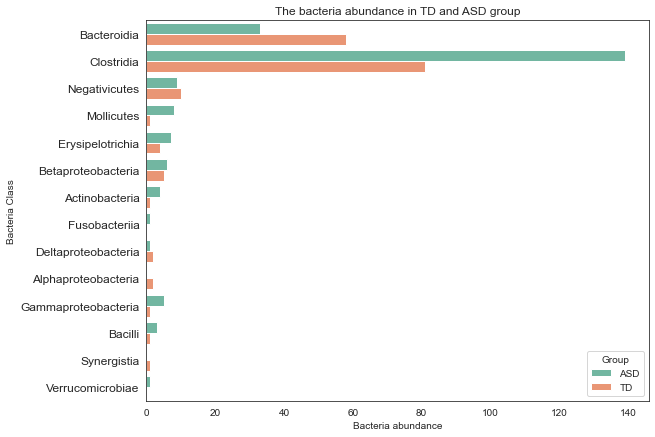

In [253]:
#bacteria abundance at Class

#the graph below doesn't match the table above

# sns.barplot(x='TD_ASDdiff', y='Class', data =df, ci=None)

fig, ax = plt.subplots(figsize = (9, 7))

pC = sns.countplot(y='Class', data=df, hue='Positive')
plt.title('The bacteria abundance in TD and ASD group')
plt.ylabel('Bacteria Class')
plt.xlabel('Bacteria abundance')
plt.legend(title="Group", labels=["ASD", "TD"], loc='lower right')
ax.yaxis.set_tick_params(labelsize='large')

plt.show() 

At the class level, Verrucomicrobiae, Actinobacteria, Fusobacteria and Gammaproteobacteria were more abundant in ASD group while Bacteroidia was more abundant in TD group.

**At Order level**


In [223]:
#at order level

dfO = (df.groupby('Order')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfO

,TD_ASDdiff
Order,
Bacteroidales,21.824176
Desulfovibrionales,3.333333
Rhodospirillales,2.500000
Synergistales,2.000000
Erysipelotrichales,-1.454545
Lactobacillales,-4.250000
Clostridiales,-4.509091
Mollicutes_RF9,-6.222222
Selenomonadales,-8.789474


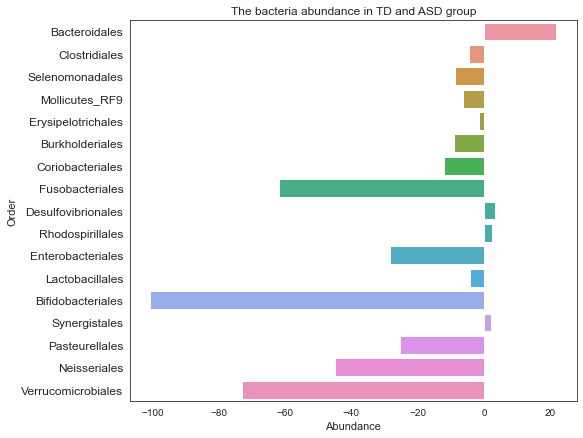

In [236]:
#bacteria abundance at Order
fig, ax = plt.subplots(figsize = (8, 7))

sns.barplot(x='TD_ASDdiff', y='Order', data =df, ci=None)

#this graph doesn't mactched the dataframe above... and same for all fo the graphs below

# pO = sns.countplot(y='Order', data=df, hue='Positive')

plt.title('The bacteria abundance in TD and ASD group')
plt.ylabel('Order', fontsize=11)
plt.xlabel('Abundance', fontsize=11)
# plt.legend(title="Group", labels=["ASD", "TD"], loc='lower right')
ax.yaxis.set_tick_params(labelsize='large')


plt.show()

At the Order level, order Bifidobacteriales(class actinobacteria), Verrucomicrobiales, Fusobacteriales, Neisseriales (class betaproteoabcteria) and Enterobacteriales were more abundant in ASD group, while Bacteroidales was more abundant in TD group. 

In conclusion, 

#### **Q2: What are the major abundance of the bacteria at the family, genus and species level?**

**At Genus level**

In [221]:
#at genus level

dfG = (df.groupby('Genus')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfG

,TD_ASDdiff
Genus,
Prevotella_9,215.500000
Megamonas,208.500000
Ruminococcus_2,70.666667
[Eubacterium]_rectale_group,63.000000
[Eubacterium]_eligens_group,30.250000
...,...
Akkermansia,-73.000000
Lachnospiraceae_NK4A136_group,-73.666667
Bifidobacterium,-100.666667


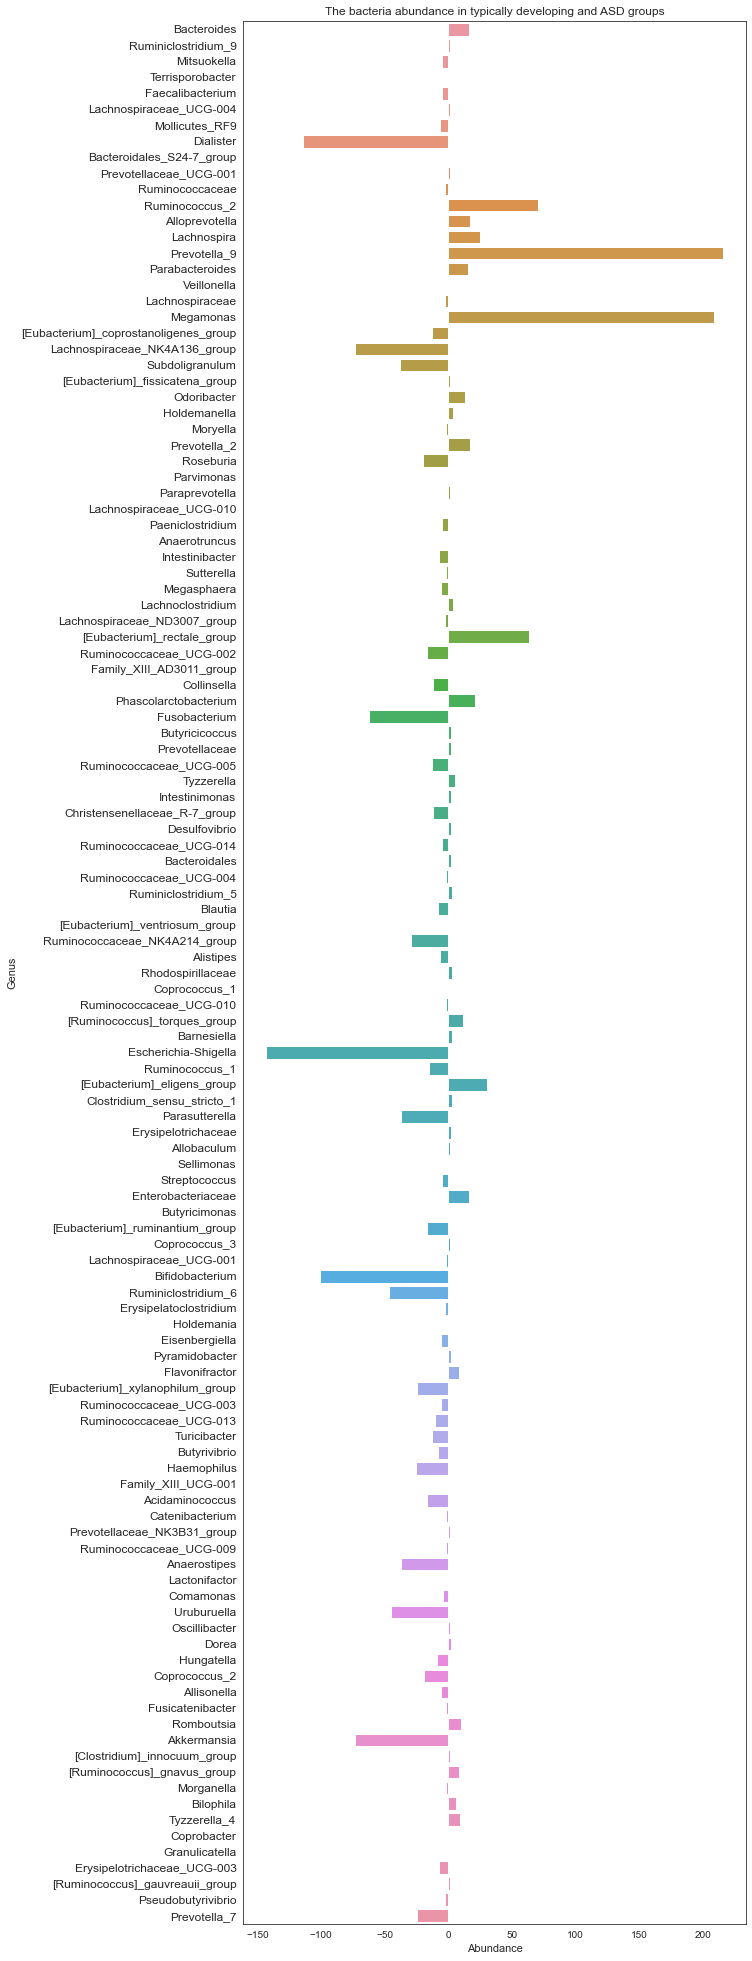

In [252]:
#bacteria abundance at Genus level
fig, ax = plt.subplots(figsize = (9, 35))

PF = sns.barplot(y='Genus', x='TD_ASDdiff', data=df, ci=None)

# pF = sns.countplot(y='Genus', data=df, hue='Positive',)
plt.title('The bacteria abundance in typically developing and ASD groups')
plt.ylabel('Genus', fontsize=11)
plt.xlabel('Abundance', fontsize=11)
# plt.legend(title="Group", labels=["ASD", "TD"], loc='lower right')
ax.yaxis.set_tick_params(labelsize='large')
plt.show()

At the genus level, the genera Escherichia-Shigella, Dialister, Bifidobacterium were more abundant in ASD group, while Prevotella 9 and Megamonas and Rumicoccus 2 were more abundant in TD group. 

**At Species level**

In [220]:
#at species level

dfS = (df.groupby('Species')['TD_ASDdiff'].mean().sort_values(ascending=False).to_frame()
      )
dfS

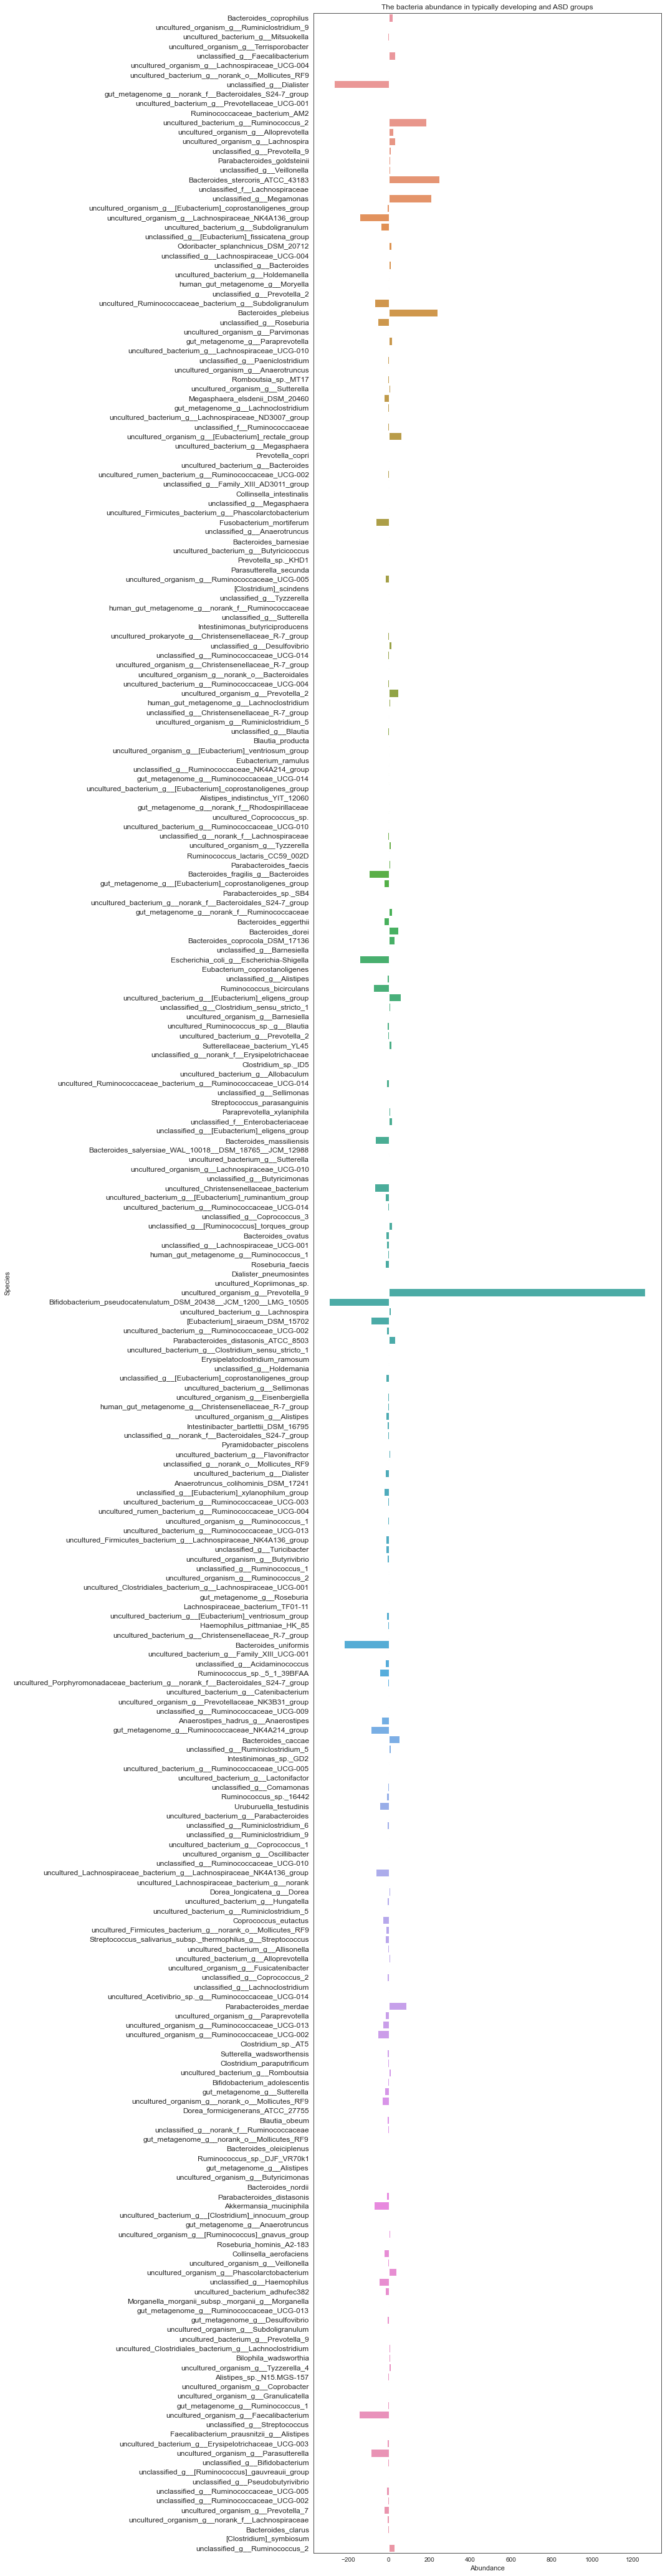

In [250]:
#bacteria abundance at Species level
fig, ax = plt.subplots(figsize = (10, 75))

PF = sns.barplot(y='Species', x='TD_ASDdiff', data=df, ci=None)

# pF = sns.countplot(y='Species', data=df, hue='Positive',)

plt.title('The bacteria abundance in typically developing and ASD groups')
plt.ylabel('Species', fontsize=11)
plt.xlabel('Abundance', fontsize=11)
# plt.legend(title="Group", labels=["ASD", "TD"], loc='lower right')
ax.yaxis.set_tick_params(labelsize='large')
plt.show()

At the species level, Bifidobacterium pseudocatenulatum DSM 20438 JCM1200 LMG 10505, unclassified Dialister, Bacteroides uniformis, uncultured organisms of Faecalibacterium, and uncultured Lachnospiraceae NK4A136 group were more abundant in ASD group. The uncultured organisms of Prevotella 9, Bacteroides stercoris ATCC 43183, Bacteroides plebeius, and unclassified Magamonas were more abundant in TD group. 

In conclusion, 